In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('../data/Iris Dataset.csv')

In [15]:

def principal_component_analysis(dataset):
    # Remove the 'Species' column and store it in a separate variable
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)

    # Normalize the dataset
    dataset_normalized = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(dataset_normalized.T)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Transform the dataset using the selected eigenvectors
    transformed_data = dataset_normalized.dot(sorted_eigenvectors)

    # Convert species labels to numeric values
    species_labels = pd.factorize(species)[0]

    # Plot the data in the first three principal components
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], transformed_data.iloc[:, 2], c=species_labels)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title('Principal Component Analysis')

    # Display the eigenvalues
    num_components = len(sorted_eigenvalues)
    plt.figure()
    plt.plot(range(1, num_components + 1), sorted_eigenvalues, 'bo-')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')

    plt.show()

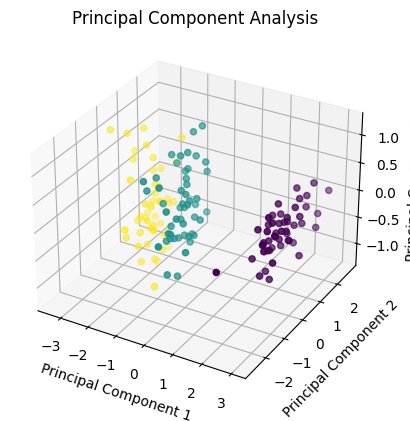

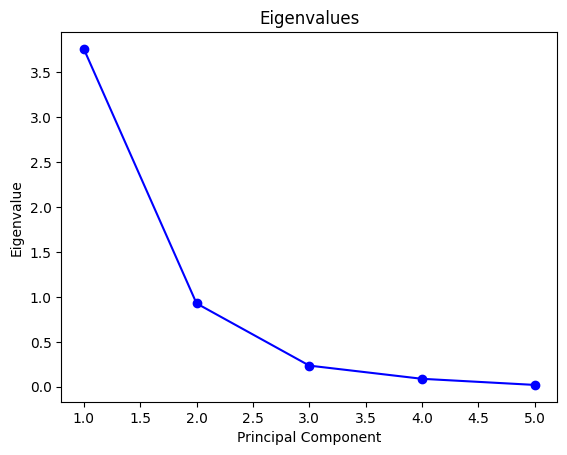

In [16]:
principal_component_analysis(dataset)